Get Preprocessed Data

In [2]:
import pandas as pd
#upload the deceptive-opinion_processed.csv first
# df = pd.read_csv('deceptive-opinion_processed.csv')
df = pd.read_csv("https://raw.githubusercontent.com/mgcresswell/TCSS555-Project/main/deceptive-opinion_processed.csv")

df.head()

,id,deceptive,hotel,polarity,source,text
0,1,deceptive,hilton,negative,MTurk,stayed schicago hilton day night conference sa...
1,2,deceptive,hilton,negative,MTurk,hotel locate mile train station quite hike tra...
2,3,deceptive,hilton,negative,MTurk,make reservation hilton chicago believe go sta...
3,4,deceptive,hilton,negative,MTurk,people think hilton think luxury know wish hal...
4,5,deceptive,hilton,negative,MTurk,husband recently stayed stayed hilton chicago ...


Get the word count

In [3]:
# import copy
# classes = copy.deepcopy(df["deceptive"].to_numpy())
# classes

In [4]:
# temp = df["polarity"]
# for i in range(len(classes)):
#     classes[i] = classes[i] + "-" + temp[i]

# classes

In [5]:
# df['deceptive-polarity'] = classes
# df = df.drop(columns=['deceptive'])
# df = df.drop(columns=['hotel', 'polarity', 'deceptive', 'source', 'id'])
# df.head()

In [6]:
text = df['text'].tolist()
words = []
for i in range(len(text)):
    for j in text[i].split(" "):
        words.append(j)
len(words)

116422

In [7]:
# l = df.to_numpy()

unique = set(words)
len(unique)

7848

In [8]:
def word_count(words):
    counts = dict()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

x = word_count(words)
# {k: v for k, v in sorted(x.items(), key=lambda item: item[1])} # found online https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

In [9]:
# sum = 0
# for i in range(1,40):
#     sum += len([k for k,v in x.items() if v == i])
#     print(len([k for k,v in x.items() if v == i]))
# print(sum)
# y = {key:val for key, val in x.items() if val > 0}
# len(y)
# unique = y.keys()
# unique
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

out = display(progress(0, len(unique)), display_id=True)

def countWord(word, text):
    count = 0
    for i in text.split(" "):
        if i == word:
            count = count + 1
    return count
    
progressI = 0
for u in unique:
    wordCountList = []
    for x in df['text']:
        wordCountList.append(countWord(u, x))
    df[u] = wordCountList
    progressI = progressI + 1
    out.update(progress(progressI, len(unique)))


df.head()

,id,deceptive,hotel,polarity,source,text,milenium,anyway,flog,injury,ethan,congestion,impression,ps150,cleanliness,remedy,fishbowl,exhibit,yellow,overnighter,24days,quilt,modern,teamwork,velveteen,convenience,thereof,nordstroms,hammer,furthermore,submit,indescriable,ran,41st,door,lime,bangkok,equivalent,9th,aother,...,intact,guidebook,excursion,stature,mgr,ich,keycard,takeout,involves,nonfeather,situation,statistical,dug,extraordinarily,cross,unidentifiable,memorabilia,bumped,ownership,whistle,condo,forgets,pocess,muscle,enthusiasm,everyday,boasting,popularity,amateur,risk,bagel,politician,softness,ramada,attractive,simpler,accuse,sensitive,cover,erica
0,0,deceptive,4,negative,0,stayed schicago hilton day night conference sa...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,deceptive,1,negative,0,hotel locate mile train station quite hike tra...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,deceptive,2,negative,0,make reservation hilton chicago believe go sta...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,deceptive,1,negative,0,people think hilton think luxury know wish hal...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,deceptive,2,negative,0,husband recently stayed stayed hilton chicago ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# df['deceptive-polarity'] = classes
# df.head()

In [11]:
tempdf = df.drop(columns=['hotel', 'polarity', 'source', 'deceptive', 'id', 'text'])
# dfClassless = tempdf.drop(columns='deceptive-polarity')
# print(tempdf)
dfClassless = tempdf
len(df)
# classify([0]*df.shape()[1], dfClassless, df['class'], 1)

1600

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfClassless, df['deceptive'], test_size=0.3)

# KNNTest(dfClassless, df['class'], dfClassless.to_numpy(), df['class'], 1)
# KNNTest(X_train, y_train, X_test.to_numpy(), y_test, 1)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1120 480 1120 480


In [13]:
# KNNTest(dfClassless, df['class'], dfClassless, df['class'], 1)

In [14]:
# KNNTest(X_train, y_train, X_test, y_test, 1)

KNN part

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# def KNNAcc(n,train_group, train_labels, test_group, test_labels):
#     clf = KNeighborsClassifier(n, metric =  "euclidean")
#     startTime = time.time()
#     clf.fit(train_group, train_labels)
#     endTime = time.time()
#     # print(clf.score(test_group, test_labels))
#     # y_pred_NN = clf.predict(test_group)
#     # accuracy_score(test_labels, y_pred_NN, normalize=True)

#     # print(clf.predict([test_group.iloc[i]]))

#     numTestVecs = len(test_labels)
#     errorCount = 0.0
#     for i in range(numTestVecs):
#         classifierResult = clf.predict([test_group.iloc[i]])
#         # print(classifierResult)
#         test_label = test_labels.iloc[i]
#         if (classifierResult != test_label): 
#             if (test_label == "deceptive-negative" and classifierResult == "truthful-positive"
#                 or test_label == "deceptive-positive" and classifierResult == "truthful-positive"
#                 or test_label == "truthful-negative" and classifierResult == "deceptive-positive"
#                 or test_label == "truthful-positive" and classifierResult == "deceptive-positive"
#                 or test_label == "deceptive-negative" and classifierResult == "truthful-negative"
#                 or test_label == "deceptive-positive" and classifierResult == "truthful-negative"
#                 or test_label == "truthful-negative" and classifierResult == "deceptive-negative"
#                 or test_label == "truthful-positive" and classifierResult == "deceptive-negative"):
#                 errorCount += 1.0

#     return 1- errorCount/float(numTestVecs),  endTime - startTime

# k= 5
# accAndTime = KNNAcc(k, X_train, y_train, X_test, y_test)
# print("accuracy", accAndTime[0], "train time", accAndTime[1])

In [58]:
def KNNAcc(n,train_group, train_labels, test_group, test_labels, metric_name):
    clf = KNeighborsClassifier(n, metric =  metric_name)
    startTime = time.time()
    clf.fit(train_group, train_labels)
    # print(clf.score(test_group, test_labels))
    y_pred_NN = clf.predict(test_group)
    endTime = time.time()
    # accuracy_score(test_labels, y_pred_NN, normalize=True)

    # print(clf.predict([test_group.iloc[i]]))

    return accuracy_score(test_labels, y_pred_NN, normalize=True),  endTime - startTime

k = 5
k2 = 15
accAndTime = KNNAcc(k, X_train, y_train, X_test, y_test, "euclidean")
print("euclidean accuracy 30-70 split", accAndTime[0], "train time", accAndTime[1])
accAndTime = KNNAcc(k2, X_train, y_train, X_test, y_test, "braycurtis")
print("braycurtis accuracy 30-70 split", accAndTime[0], "train time", accAndTime[1])

euclidean accuracy 30-70 split 0.61875 train time 11.597561359405518
braycurtis accuracy 30-70 split 0.78125 train time 9.331845045089722


In [46]:
from sklearn.model_selection import cross_val_score
def KNNAccCrossFold(n,X,y, metric_name):
    clf = KNeighborsClassifier(n, metric =  metric_name)
    return cross_val_score(clf, X, y, cv=10).mean()

print("euclidean kfold accuracy k=5", KNNAccCrossFold(k, dfClassless, df['deceptive'], "euclidean"))

euclidean kfold accuracy 0.565625


In [59]:
print("braycurtis kfold accuracy k = 15",KNNAccCrossFold(k2, dfClassless, df['deceptive'], "braycurtis"))

braycurtis kfold accuracy k = 15 0.740625


In [50]:
import matplotlib.pyplot as plt
import time
import statistics 

X_test_0, y_test_0 = [X_test.iloc[0]], [y_test.iloc[0]]
tempList = []
for i in range(100):
    startTime = time.time()
    KNNAcc(k, X_train, y_train, X_test_0, y_test_0, "euclidean")
    endTime = time.time()
    tempList.append(endTime - startTime)

print("euclidean running time of 1 entry of the testing data", statistics.mean(tempList))




euclidean running time of 1 entry of the testing data 1.1362310433387757
braycurtis running time of 1 entry of the testing data 0.8817605566978455


In [56]:
tempList = []
for i in range(100):
    startTime = time.time()
    KNNAcc(k, X_train, y_train, X_test_0, y_test_0, "braycurtis")
    endTime = time.time()
    tempList.append(endTime - startTime)

print("braycurtis running time of 1 entry of the testing data", statistics.mean(tempList))

braycurtis running time of 1 entry of the testing data 0.8563843989372253


KNN trial and error of K

euclidean
k: 1
accuracy: 0.6166666666666667
-----
k: 2
accuracy: 0.5645833333333333
-----
k: 3
accuracy: 0.6229166666666667
-----
k: 4
accuracy: 0.5916666666666667
-----
k: 5
accuracy: 0.61875
-----
k: 6
accuracy: 0.5875
-----
k: 7
accuracy: 0.60625
-----
k: 8
accuracy: 0.5833333333333334
-----
k: 9
accuracy: 0.5979166666666667
-----
k: 10
accuracy: 0.58125
-----


Text(0.5, 0, 'values of k')

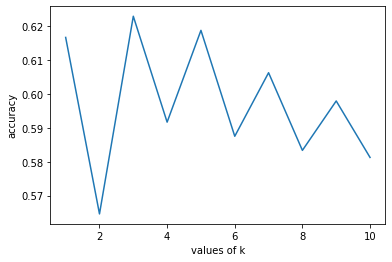

In [55]:
knnX = list(range(1,11))
knnY = []
# timeList = []
print("euclidean")
for i in knnX:
    # startTime = time.time()
    y = KNNAcc(i, X_train, y_train, X_test, y_test, "euclidean")[0]
    # y = KNNAccCrossFold(i, dfClassless, df['deceptive'], "braycurtis")
    # endTime = time.time()
    knnY.append(y)
    # timeList.append(endTime - startTime)
    print("k:", i)
    # print("accuracy:", y)
    print("accuracy:", y)
    # print("accuracy:", y[0], " testing running time: ", y[1])#endTime - startTime 
    print("-----")
# print("Average running time: ", statistics.mean(timeList))
plt.plot(knnX, knnY)
plt.ylabel('accuracy')
plt.xlabel('values of k')

k: 1
accuracy: 0.6645833333333333
-----
k: 2
accuracy: 0.6416666666666667
-----
k: 3
accuracy: 0.7145833333333333
-----
k: 4
accuracy: 0.6833333333333333
-----
k: 5
accuracy: 0.7375
-----
k: 6
accuracy: 0.7104166666666667
-----
k: 7
accuracy: 0.7395833333333334
-----
k: 8
accuracy: 0.7208333333333333
-----
k: 9
accuracy: 0.7416666666666667
-----
k: 10
accuracy: 0.7145833333333333
-----
k: 11
accuracy: 0.7520833333333333
-----
k: 12
accuracy: 0.7291666666666666
-----
k: 13
accuracy: 0.76875
-----
k: 14
accuracy: 0.75625
-----
k: 15
accuracy: 0.78125
-----
k: 16
accuracy: 0.75625
-----
k: 17
accuracy: 0.7708333333333334
-----
k: 18
accuracy: 0.7520833333333333
-----
k: 19
accuracy: 0.775
-----
k: 20
accuracy: 0.7458333333333333
-----


Text(0.5, 0, 'values of k')

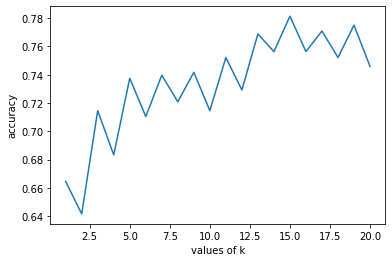

In [54]:
knnX = list(range(1,21))
knnY = []
# timeList = []
print("braycurtis")
for i in knnX:
    # startTime = time.time()
    y = KNNAcc(i, X_train, y_train, X_test, y_test, "braycurtis")[0]
    # y = KNNAccCrossFold(i, dfClassless, df['deceptive'], "braycurtis")
    # endTime = time.time()
    knnY.append(y)
    # timeList.append(endTime - startTime)
    print("k:", i)
    # print("accuracy:", y)
    print("accuracy:", y)
    # print("accuracy:", y[0], " testing running time: ", y[1])#endTime - startTime 
    print("-----")
# print("Average running time: ", statistics.mean(timeList))
plt.plot(knnX, knnY)
plt.ylabel('accuracy')
plt.xlabel('values of k')

Decision Tree part

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred_NN = clf.predict(X_test)

accuracy_score(y_test, y_pred_NN, normalize=True)

0.68125

In [61]:
def DecisionAccuracy(train_group, train_labels, test_group, test_labels):
    clf = DecisionTreeClassifier(random_state=0)
    startTime = time.time()
    clf.fit(train_group, train_labels)
    endTime = time.time()
    y_pred_NN = clf.predict(test_group)

    return accuracy_score(test_labels, y_pred_NN, normalize=True),  endTime - startTime

accAndTime = DecisionAccuracy(X_train, y_train, X_test, y_test)

In [ ]:
accAndTime